In [41]:
%pylab inline
import vessel_scoring.models
import json
import datetime

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
models = vessel_scoring.models.load_models()

In [109]:
def messages_from_bq_dump(path):
    with open(path) as f:
        for row in f:
            row = json.loads(row)
            distance = row.get('distance_from_shore')
            row = {key: value for (key, value) in row.iteritems()
                if key in ('timestamp', 'course', 'speed')}
            row['timestamp'] = datetime.datetime.fromtimestamp(int(row['timestamp']))
            if row.get('course') is not None:
                row['course'] = float(row['course'])
            if row.get('speed') is not None:
                row['speed'] = float(row['speed'])
            if distance is not None and float(distance) / 1852.0 < 3:
                row = {'ignore': row}
            yield row

In [110]:
messages = models['Logistic'].predict_messages(
    messages_from_bq_dump("/home/redhog/Downloads/results-20170601-170811.json"))

In [111]:
messages = [msg.get('ignore', msg) for msg in messages]

In [112]:
m = np.zeros(len(messages), dtype=[
        ('course', 'float'),
('measure_cos_course', 'float'),
('measure_course', 'float'),
('measure_courseavg_43200', 'float'),
('measure_coursestddev_43200', 'float'),
('measure_coursestddev_43200_log', 'float'),
('measure_latavg_43200', 'float'),
('measure_lonavg_43200', 'float'),
('measure_new_score', 'float'),
('measure_pos_43200', 'float'),
('measure_sin_course', 'float'),
('measure_speed', 'float'),
('measure_speedavg_43200', 'float'),
('measure_speedstddev_43200', 'float'),
('measure_speedstddev_43200_log', 'float'),
('speed', 'float'),
('timestamp', 'float')
    ])

for idx, msg in enumerate(messages):
    for key in msg:
        val = msg[key]
        if key == 'timestamp':
            val = (val - datetime.datetime(1970, 1, 1)).total_seconds()
        m[idx][key] = val

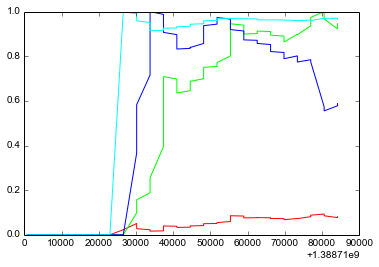

In [113]:
plt.plot(m['timestamp'], m['measure_new_score'], color='red')
#plt.plot(m['timestamp'], m['speed'] / 7, color='green')
#plt.plot(m['timestamp'], m['course'] / 360, color='blue')
plt.plot(m['timestamp'], m['measure_coursestddev_43200'] / m['measure_coursestddev_43200'].max(), color='#00ff00')
plt.plot(m['timestamp'], m['measure_speedstddev_43200'] / m['measure_speedstddev_43200'].max(), color='#0000ff')
plt.plot(m['timestamp'], m['measure_speedavg_43200'] / m['measure_speedavg_43200'].max(), color='#00ffff')
plt.show()

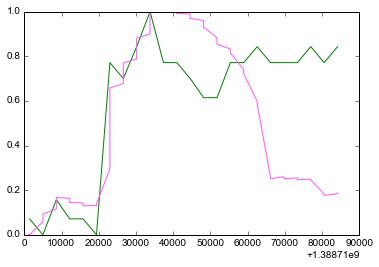

In [76]:
plt.plot(m['timestamp'], m['speed'] / 7, color='green')
plt.plot(m['timestamp'], m['measure_speedstddev_43200'] / m['measure_speedstddev_43200'].max(), color='#ff55ff')
#plt.plot(m['timestamp'], m['measure_speedavg_43200'] / m['measure_speedavg_43200'].max(), color='blue')
plt.show()

In [87]:
(m['timestamp'].max() - m['timestamp'].min()) / (60*60)

23.166666666666668

{'content': {u'course': 245.0,
  u'speed': 5.9,
  u'timestamp': datetime.datetime(2014, 1, 4, 0, 10)}}